# Project Template: Phase 1

Below are some concrete steps that you can take while doing your analysis. This guide isn't "one size fit all" so you will probably not do everything listed. But it still serves as a good "pipeline" for how to do data analysis.

If you do engage in a step, you should clearly mention it in the notebook.

---


## Loading Data

In the cells below, make sure to do the following:

1. Load your dataset. If your dataset contains multiple files (e.g. AirBnB), make sure to merge them.
2. Decide what attribute you want to predict (you can change your mind later during EDA if needed).

### Types of Attributes

Below are some examples of types of attributes you may encounter. For some types of data, ML algorithms cannot use them directly, so we have to encode them somehow. We have summarized ways to deal with these non-traditional data types. There are more examples in Follow content for this week.

Make a note of which types of data your dataset has.

Traditional data types (individual numbers/values): no transformation needed

  * Nominal
    * Binary
  * Ordinal
  * Interval
  * Ratio
  * Continuous
  * Discrete

Non-traditional data types:
 
* **Text**
    * Encode with: [Bag of Words](https://scikit-learn.org/stable/modules/feature_extraction.html#the-bag-of-words-representation), [TF-IDF](https://scikit-learn.org/stable/modules/feature_extraction.html#tfidf-term-weighting), Embeddings
* **Sets** (e.g. tags {"Blog", "Video", "Finance Article"})
    * We should not treat these like  bag of words, since tags can be multi word
    * We can use [one hot encoding](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html).
* **Time series data**: A series of numbers, e.g. predict the stock price next year from the last N years of prices.
    * Naive approaches: We can use each of the following as a separate feature:
        * Last value: Use the last value in the series.
        * Average, Median: Use the average or median of the values.
        * Max/min: Use the max and min of the values.
    * A more effective approach is to use a ML model that can take time-series data in as an input, such as an [Long Short-Term Memory](https://en.wikipedia.org/wiki/Long_short-term_memory) model, but these are out of scope for this course.
* **Numeric Data** that isn't directly interpretable (e.g. geospatial data)
    * This varies from situation to situation. Sometimes your data is numeric but isn't directly predictive of your class label (e.g. latitude and longitude; movie title). However, you may be able to combine this with other datasets to construct more meaningful features (e.g. State, Movie Genre).

In [1]:
# Load your datasets

In [2]:
import pandas as pd
df = pd.read_csv (r'/home/aaronlinder/Documents/DataMining/week7/US_Accidents_Dec20_updated.csv')
print (df)

                ID  Severity           Start_Time             End_Time  \
0        A-2716600         3  2016-02-08 00:37:08  2016-02-08 06:37:08   
1        A-2716601         2  2016-02-08 05:56:20  2016-02-08 11:56:20   
2        A-2716602         2  2016-02-08 06:15:39  2016-02-08 12:15:39   
3        A-2716603         2  2016-02-08 06:15:39  2016-02-08 12:15:39   
4        A-2716604         2  2016-02-08 06:51:45  2016-02-08 12:51:45   
...            ...       ...                  ...                  ...   
1516059  A-4239402         2  2019-08-23 18:03:25  2019-08-23 18:32:01   
1516060  A-4239403         2  2019-08-23 19:11:30  2019-08-23 19:38:23   
1516061  A-4239404         2  2019-08-23 19:00:21  2019-08-23 19:28:49   
1516062  A-4239405         2  2019-08-23 19:00:21  2019-08-23 19:29:42   
1516063  A-4239406         2  2019-08-23 18:52:06  2019-08-23 19:21:31   

         Start_Lat  Start_Lng   End_Lat    End_Lng  Distance(mi)  \
0         40.10891  -83.09286  40.11206  -8

The attribute I will predict is: **Write your attribute here** Severity, Day or Night.

## Exploratory Data Analysis (EDA)

Using some of the techniques in the "Follow" document, explore your dataset. Then answer the following questions (you don't have to solve the problems yet - just be aware of them):

1. What attribute are you predicting and what type of supervised learning is this?
    * Binary Classification: Just 2 class labels
    * Multi-class classification: More than 2 class labels
    * Regression: A continuous variable
    * Ordinal classification: Predicting an ordinal value, e.g. a rating on a 5-star scale 
        * This is tricky! Do you want to change this into regression or binarize your variable to make this binary classification?

Ordinal Classification and binary classification

2. Do you need to perform feature selection?
    * E.g. do you have hihgly correlated features?  I am not sure at this point

3. Do you have any non-traditional attributes (see the list above)? If so how will you encode them? (You don't have to do it yet.)

4. If you are doing classification, are your class labels balanced (similar numbers of instances from each class)?

5. If you are doing regression, how is your dependent variable distributed (e.g. normally, skewed)?
    
6. Do any of your features need transformation (e.g. because they have a skewed distribution)?


Answer the questions below:

1. 
2. 
3. 
4. 
5. 
6. 

## Preprocessing

Do the following steps on your data (and any others you think are needed). See the "Follow" examples, as well as the original Week 2 materials for more on how to do each step.

1. **Feature Cleaning**: Remove meaningless features (e.g. IDs), or unfair features that make the problem too easy (e.g. percent grade should be removed if predicing final letter grade).
2. **Feature Discretization**: Discretize any attributes that should be discretized.
3. **Feature Transformation** Encode non-standard features into usable formats (standardize dates, vectorize words). Tranform any features (e.g. using a log-transform) as needed.
4. **Feature Selection**: Remove redundant, noisy features or unhelpful features.
5. **Aggregation**: If your data has multiple rows per class label, transform it so that there is only one row per class label.

Now revisit EDA as needed to see what your transformed dataset looks like.

If you don't need to do a given step, just skip it an exaplin why.

### 1) Feature cleaning

In [3]:
df.columns
df1 = df.drop(columns=['Country','ID','Description','Street','Side','City','County','State','Zipcode','Timezone','Airport_Code','Weather_Timestamp','Description','Amenity',
                      'Bump','Crossing','Give_Way','Junction','No_Exit','Weather_Timestamp','Wind_Direction','Number'])
df1.columns
df1.Weather_Condition
def weather(x):
    if (x=="Light Rain"):
        return 1
    elif (x=="Overcast"):
        return 2
    elif (x=="Partly Cloudy"):
        return 3
    else:
        return 4
### 2) Feature discretization
df1.Weather_Condition = df1.Weather_Condition.apply(weather)
df1.columns

Index(['Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)',
       'Precipitation(in)', 'Weather_Condition', 'Railway', 'Roundabout',
       'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop',
       'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

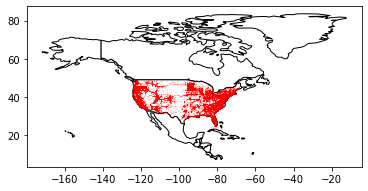

In [4]:

import geopandas
import matplotlib.pyplot as plt
%matplotlib inline


dfcoord = df[['Start_Lat','Start_Lng']]
gdf = geopandas.GeoDataFrame(
    df, geometry=geopandas.points_from_xy(dfcoord.Start_Lng, dfcoord.Start_Lat))
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

# We restrict to North America.
ax = world[world.continent == 'North America'].plot(
    color='white', edgecolor='black')

# We can now plot our ``GeoDataFrame``.
gdf.plot(ax=ax, color='red', markersize = .0001)

plt.show()

### 3) Feature transformation


In [5]:
df1['Start_Time'] = pd.to_datetime(df1.Start_Time)

df1['End_Time'] = pd.to_datetime(df1.End_Time)
df1


,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Temperature(F),Wind_Chill(F),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.10891,-83.09286,40.11206,-83.03187,3.230,42.1,36.1,...,False,False,False,False,False,False,Night,Night,Night,Night
1,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.86542,-84.06280,39.86501,-84.04873,0.747,36.9,NaN,...,False,False,False,False,False,False,Night,Night,Night,Night
2,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.10266,-84.52468,39.10209,-84.52396,0.055,36.0,NaN,...,False,False,False,False,False,False,Night,Night,Night,Day
3,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.10148,-84.52341,39.09841,-84.52241,0.219,36.0,NaN,...,False,False,False,False,False,False,Night,Night,Night,Day
4,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.06213,-81.53784,41.06217,-81.53547,0.123,39.0,NaN,...,False,False,False,False,False,False,Night,Night,Day,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1516059,2,2019-08-23 18:03:25,2019-08-23 18:32:01,34.00248,-117.37936,33.99888,-117.37094,0.543,86.0,86.0,...,False,False,False,False,False,False,Day,Day,Day,Day
1516060,2,2019-08-23 19:11:30,2019-08-23 19:38:23,32.76696,-117.14806,32.76555,-117.15363,0.338,70.0,70.0,...,False,False,False,False,False,False,Day,Day,Day,Day
1516061,2,2019-08-23 19:00:21,2019-08-23 19:28:49,33.77545,-117.84779,33.77740,-117.85727,0.561,73.0,73.0,...,False,False,False,False,False,False,Day,Day,Day,Day
1516062,2,2019-08-23 19:00:21,2019-08-23 19:29:42,33.99246,-118.40302,33.98311,-118.39565,0.772,71.0,71.0,...,False,False,False,False,False,False,Day,Day,Day,Day


### 4) Feature selection

In [6]:
def getHour(x):
    return x.hour
df1['Start_Time'] = df1.Start_Time.apply(getHour)
df1['End_Time'] = df1.End_Time.apply(getHour)

### 5) Aggregation

Text(0.5, 0, 'Hours of the day crashes occured')

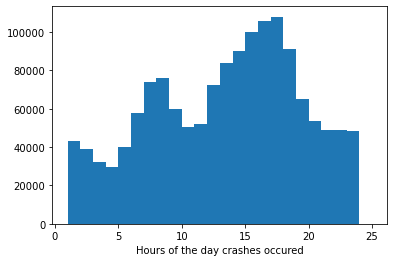

In [7]:
bins_list = [1, 2, 3, 4, 5, 6, 7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25]
n, bins, patches = plt.hist(df1.Start_Time, bins = bins_list)
bins

plt.xlabel("Hours of the day crashes occured")


### Revisiting EDA

In [10]:
"""24 historgram of hours of the day which has the most accidents
"""

def return_true_or_false(x):
    if (x == True):
        return 1
    else:
        return 0
def convert_day_or_night(x):
    if (x == 'Day'):
        return 1
    else:
        return 0
    

df1.Roundabout = df1.Roundabout.apply(return_true_or_false)
df1.Railway = df1.Railway.apply(return_true_or_false)
df1.Station = df1.Station.apply(return_true_or_false)
df1.Stop = df1.Stop.apply(return_true_or_false)
df1.Traffic_Calming = df1.Traffic_Calming.apply(return_true_or_false)
df1.Traffic_Signal = df1.Traffic_Signal.apply(return_true_or_false)
df1.Turning_Loop = df1.Turning_Loop.apply(return_true_or_false)
df1.Sunrise_Sunset = df1.Sunrise_Sunset.apply(convert_day_or_night)
df1.Civil_Twilight = df1.Civil_Twilight.apply(convert_day_or_night)
df1.Nautical_Twilight = df1.Nautical_Twilight.apply(convert_day_or_night)
df1.Astronomical_Twilight = df1.Astronomical_Twilight.apply(convert_day_or_night)
df1


,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Temperature(F),Wind_Chill(F),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,3,0,6,40.10891,-83.09286,40.11206,-83.03187,3.230,42.1,36.1,...,0,0,0,0,0,0,0,0,0,0
1,2,5,11,39.86542,-84.06280,39.86501,-84.04873,0.747,36.9,NaN,...,0,0,0,0,0,0,0,0,0,0
2,2,6,12,39.10266,-84.52468,39.10209,-84.52396,0.055,36.0,NaN,...,0,0,0,0,0,0,0,0,0,0
3,2,6,12,39.10148,-84.52341,39.09841,-84.52241,0.219,36.0,NaN,...,0,0,0,0,0,0,0,0,0,0
4,2,6,12,41.06213,-81.53784,41.06217,-81.53547,0.123,39.0,NaN,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1516059,2,18,18,34.00248,-117.37936,33.99888,-117.37094,0.543,86.0,86.0,...,0,0,0,0,0,0,0,0,0,0
1516060,2,19,19,32.76696,-117.14806,32.76555,-117.15363,0.338,70.0,70.0,...,0,0,0,0,0,0,0,0,0,0
1516061,2,19,19,33.77545,-117.84779,33.77740,-117.85727,0.561,73.0,73.0,...,0,0,0,0,0,0,0,0,0,0
1516062,2,19,19,33.99246,-118.40302,33.98311,-118.39565,0.772,71.0,71.0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
df1.to_csv('/home/aaronlinder/Documents/DataMining/week7/df1.csv')